# Setup

In [22]:
# Install necessary packages
!pip install opendatasets

In [23]:
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# For reading the dataset from Kaggle
import opendatasets as od
import pandas

# For reading the image file paths from the "Files" tab
import os

# For getting the actual images from "Files" tab, from a file path
import PIL
from PIL import Image

# For specifying variable types
from typing import Tuple

In [24]:
# Set the random seed
np.random.seed(42)

# Define some variables
labels = ("airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person")

# Data setup

In [25]:
# Load the dataset from Kaggle


# Download Kaggle API token key from the Kaggle website while logged into your account
# Use this key to login when running this code block
dataset_path = "https://www.kaggle.com/datasets/prasunroy/natural-images"
od.download(dataset_path)

Skipping, found downloaded files in "./natural-images" (use force=True to force download)


In [33]:
# Retrieves the data


# Returns the images and labels of all examples in the dataset
def load_dataset(dataset_directory: str):# -> Tuple[PIL.JpegImagePlugin.JpegImageFile, str]:
  x_temp, y_temp = [], []
  # Traverse through the directory
  for root, directories, files in os.walk(dataset_directory):
    for filename in files:
      # Join the strings to get the file's full path
      filepath = os.path.join(root, filename)
      for label in labels:
        # An example is labeled if its file path contains the label in its name
        if label in filename:
          x_temp.append(Image.open(filepath))
          y_temp.append(label)
  return x_temp, y_temp


natural_dataset_path = "natural-images/data/natural_images"
x_raw, y_raw = load_dataset(natural_dataset_path)
if len(x_raw) != len(y_raw):
  Exception("x train and y train have unequal sizes")
m = len(x_raw)

In [34]:
# Prepares the data before splitting it into training, validation, and test sets


# Returns the average dimension size of the entire dataset
def get_average_image_size(images):
  avg_height = 0
  avg_width = 0
  for image in images:
    avg_height += image.height
    avg_width += image.width
  avg_height /= m
  avg_width /= m
  avg_height = int(avg_height)
  avg_width = int(avg_width)
  return avg_height, avg_width


# Resizes all dataset images to be the same size
def resize_images(images, new_size):
  for i in range(len(images)):
    images[i] = images[i].resize(new_size)
  return images


ideal_size = get_average_image_size(x_raw)
x_resized = resize_images(x_raw, ideal_size)

x train all shape =  (6899, 234, 198, 3)
y train all shape =  (6899,)
x test shape =  (1380, 234, 198, 3)
y test shape =  (1380,)
x dev shape =  (1380, 234, 198, 3)
y dev shape =  (1380,)
x train shape =  (4139, 234, 198, 3)
y train shape =  (4139,)


'airplane'

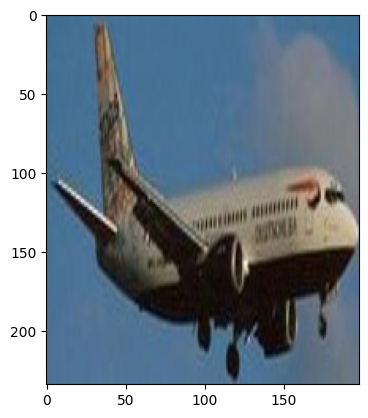

In [43]:
# Starts splitting up the data


'''
For reference, output from HW 3 for set shapes
x train all  (60000, 28, 28)
y train all  (60000,)
x train  (55000, 28, 28)
y train  (55000,)
x dev  (5000, 28, 28)
y dev  (5000,)
x test  (10000, 28, 28)
y test  (10000,)
'''

# Maybe also try np.asarray and np.copy
x_train_all = np.array(x_resized)
y_train_all = np.array(y_raw)

# Another working way to split the datasets
# twenty_percent_split = int(m * 0.2)
# x_test = x_train_all[:twenty_percent_split]
# y_test = y_train_all[:twenty_percent_split]
# x_dev = x_train_all[twenty_percent_split:2 * twenty_percent_split]
# y_dev = y_train_all[twenty_percent_split:2 * twenty_percent_split]
# x_train = x_train_all[2 * twenty_percent_split:]
# y_train = y_train_all[2 * twenty_percent_split:]

# Split the datasets
# 60% training, 40% testing
x_train, x_test_all, y_train, y_test_all = train_test_split(x_train_all, y_train_all, test_size = 0.4, random_state = 42)
# From the 40% testing, it gets split into 20% validation and 20% (actual) testing
x_dev, x_test, y_dev, y_test = train_test_split(x_test_all, y_test_all, test_size = 0.5, random_state = 42)

print("x train all shape = ", x_train_all.shape)
print("y train all shape = ", y_train_all.shape)
print("x test shape = ", x_test.shape)
print("y test shape = ", y_test.shape)
print("x dev shape = ", x_dev.shape)
print("y dev shape = ", y_dev.shape)
print("x train shape = ", x_train.shape)
print("y train shape = ", y_train.shape)

testIndex = 1111
plt.imshow(x_train_all[testIndex])
y_train_all[testIndex]